# ROC Curve for MBTI

## Global Variables

In [33]:
tm = [
    "XLNet Base",
    
    "BERT Base",
    "BERT Multilingual",
    
    "Distil BERT Base",
    "Distil BERT Multilingual",
    
    "Distil RoBERTa",
    "RoBERTa Base",
    
    "XLM RoBERTa",
    
    "ELECTRA Base",
    "ELECTRA Small"
]
sub_path_name = [
    ["xlnet", "xlnet-base-cased"],

    ["bert", "bert-base-cased"],
    ["bert", "bert-base-multilingual-cased"],

    ["distilbert", "distilbert-base-uncased"],
    ["distilbert", "distilbert-base-multilingual-cased"],

    ["roberta", "distilroberta-base"],
    ["roberta", "roberta-base"],

    ["xlmroberta", "xlm-roberta-base"],

    ["electra", "google/electra-base-discriminator"],
    ["electra", "google/electra-small-discriminator"]
]

## All models True Probabilities

In [34]:
import json

probs = []
for transformer_path in sub_path_name:
    path = f"../outputs/{transformer_path[0]}-{transformer_path[1]}-outputs/mbti-test_results.json"
    with open(path, 'r') as json_file:
        d = json.load(json_file)
        probs.append(d["raw_outputs"])


## Expected outputs

In [35]:
import pandas as pd
import ast

df = pd.read_csv("../datasets/test.csv")

df.head()

,text,labels
0,okay love someone pretty sure intj see value a...,"[1, 1, 0, 1]"
1,le type intellect honesty life experience neve...,"[1, 0, 1, 0]"
2,google intp came sorry hate picture post cuz g...,"[1, 1, 1, 0]"
3,whole life worked really hard screw successful...,"[1, 0, 0, 1]"
4,young infj considering either going nursing ev...,"[1, 1, 0, 1]"


In [36]:
Y_test = []

for idx in df.index:
    Y_test.append(ast.literal_eval(df["labels"][idx]))
    
print(Y_test)

[[1, 1, 0, 1], [1, 0, 1, 0], [1, 1, 1, 0], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 0], [1, 1, 1, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 1], [0, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [0, 1, 1, 0], [0, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 0, 0], [1, 1, 1, 0], [0, 1, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 1, 1, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 0, 1], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 0, 0], [1, 0, 1, 0], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 0, 0], [1, 1, 1, 1], [1, 1, 0, 0], [1, 1, 1, 1], [0, 1, 0, 1], [1, 1, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 0, 0], [0, 1, 1, 0], [1, 0, 0, 0], [1, 0, 1, 0], [1, 0, 1, 0], [1, 1, 0, 1], [1, 1, 0, 0], [1, 1, 0, 0], [1, 1

## **Computing AUROC and ROC curve values**

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUROC**

In [38]:
def flatten_label(l, label):
    return [elem[label] for elem in l]

In [39]:
transformers_auc = [
    [roc_auc_score(flatten_label(Y_test, label), flatten_label(tm_probs, label)) for label in range (4)]
    for tm_probs in probs]

for i in range(len(transformers_auc)):
    print(tm[i], end=": ")
    print(["%0.4f" % item for item in transformers_auc[i]])

XLNet Base: ['0.5117', '0.5000', '0.5000', '0.5045']
BERT Base: ['0.8381', '0.8857', '0.8960', '0.8412']
BERT Multilingual: ['0.8440', '0.9023', '0.8972', '0.8423']
Distil BERT Base: ['0.8749', '0.8839', '0.9159', '0.8848']
Distil BERT Multilingual: ['0.8754', '0.8926', '0.9197', '0.8656']
Distil RoBERTa: ['0.8740', '0.8896', '0.9265', '0.8736']
RoBERTa Base: ['0.5000', '0.5100', '0.5000', '0.4897']
XLM RoBERTa: ['0.4832', '0.5000', '0.7086', '0.4862']
ELECTRA Base: ['0.8686', '0.8656', '0.9008', '0.8598']
ELECTRA Small: ['0.8397', '0.8715', '0.8865', '0.8565']


### Calculate Best models

In [40]:
results =[]
for i in range(len(transformers_auc)):
    results.append([sum(transformers_auc[i])/4,i])

def takeFirst(elem):
    return elem[0]
    
results.sort(key=takeFirst)

results.reverse()

for i in results:
    print(f"{tm[i[1]]} with AUC:", end="")
    print(["%0.6f" % item for item in transformers_auc[i[1]]], end=" ")
    print(f"Avg:  %0.6f" % i[0])

tr_order = [i[1] for i in results]
    
print(tr_order)

saved_order = {}
for i in range(0, len(tm)):
    saved_order[i]=tr_order[i]

with open("tm_order.json", "w") as outfile:
    json.dump(saved_order, outfile, indent = 4)

Distil RoBERTa with AUC:['0.873952', '0.889552', '0.926522', '0.873644'] Avg:  0.890917
Distil BERT Base with AUC:['0.874941', '0.883914', '0.915852', '0.884811'] Avg:  0.889879
Distil BERT Multilingual with AUC:['0.875367', '0.892585', '0.919720', '0.865571'] Avg:  0.888310
ELECTRA Base with AUC:['0.868586', '0.865589', '0.900755', '0.859750'] Avg:  0.873670
BERT Multilingual with AUC:['0.843981', '0.902266', '0.897153', '0.842339'] Avg:  0.871435
BERT Base with AUC:['0.838084', '0.885676', '0.895956', '0.841212'] Avg:  0.865232
ELECTRA Small with AUC:['0.839733', '0.871540', '0.886456', '0.856525'] Avg:  0.863563
XLM RoBERTa with AUC:['0.483195', '0.500000', '0.708608', '0.486235'] Avg:  0.544509
XLNet Base with AUC:['0.511685', '0.500000', '0.500000', '0.504462'] Avg:  0.504037
RoBERTa Base with AUC:['0.500000', '0.510000', '0.500000', '0.489662'] Avg:  0.499916
[5, 3, 4, 8, 2, 1, 9, 7, 0, 6]


### **Calculate ROC curve**

In [41]:
fpr_tpr_IE = [roc_curve(flatten_label(Y_test, 0), flatten_label(tm_probs, 0)) for tm_probs in probs]
fpr_tpr_NS = [roc_curve(flatten_label(Y_test, 1), flatten_label(tm_probs, 1)) for tm_probs in probs]
fpr_tpr_TF = [roc_curve(flatten_label(Y_test, 2), flatten_label(tm_probs, 2)) for tm_probs in probs]
fpr_tpr_JP = [roc_curve(flatten_label(Y_test, 3), flatten_label(tm_probs, 3)) for tm_probs in probs]

## **Plot the ROC curve**

### Introversion/ Extraversion

In [42]:
import matplotlib.pyplot as plt

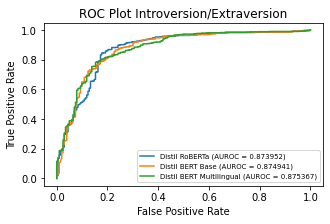

In [43]:
# Size
plt.figure(figsize=(5, 3))
for it in range(3):
    i = tr_order[it]
    plt.plot(fpr_tpr_IE[i][0], fpr_tpr_IE[i][1], label=f"{tm[i]} (AUROC = %0.6f)" % transformers_auc[i][0])

# Title
plt.title('ROC Plot Introversion/Extraversion')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(fontsize="x-small") # 
# var save
fig1 = plt.gcf()
# Save Fig
fig1.savefig("../figures/ROC Curves/IE_1.png", dpi=300)
plt.show()

### iNtuition/Sensing

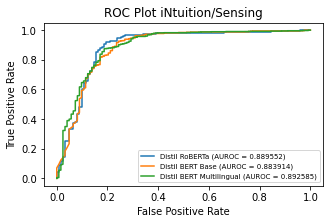

In [44]:
# Size
plt.figure(figsize=(5, 3))
for it in range(3):
    i = tr_order[it]
    plt.plot(fpr_tpr_NS[i][0], fpr_tpr_NS[i][1], label=f"{tm[i]} (AUROC = %0.6f)" % transformers_auc[i][1])

# Title
plt.title('ROC Plot iNtuition/Sensing')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(fontsize="x-small") # 
# var save
fig1 = plt.gcf()
# Save Fig
fig1.savefig("../figures/ROC Curves/NS_1.png", dpi=300)
plt.show()

### Thinking/Feeling

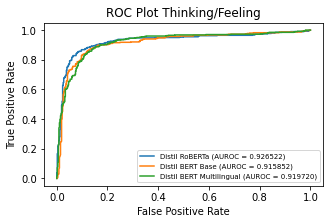

In [45]:
# Size
plt.figure(figsize=(5, 3))
for it in range(3):
    i = tr_order[it]
    plt.plot(fpr_tpr_TF[i][0], fpr_tpr_TF[i][1], label=f"{tm[i]} (AUROC = %0.6f)" % transformers_auc[i][2])

# Title
plt.title('ROC Plot Thinking/Feeling')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(fontsize="x-small") # 
# var save
fig1 = plt.gcf()
# Save Fig
fig1.savefig("../figures/ROC Curves/TF_1.png", dpi=300)
plt.show()

### Judgement/Perception

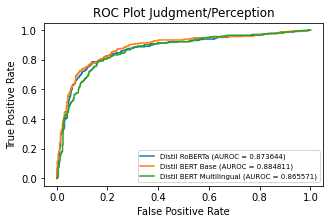

In [46]:
# Size
plt.figure(figsize=(5, 3))
for it in range(3):
    i = tr_order[it]
    plt.plot(fpr_tpr_JP[i][0], fpr_tpr_JP[i][1], label=f"{tm[i]} (AUROC = %0.6f)" % transformers_auc[i][3])

# Title
plt.title('ROC Plot Judgment/Perception')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(fontsize="x-small") # 
# var save
fig1 = plt.gcf()
# Save Fig
fig1.savefig("../figures/ROC Curves/JP_1.png", dpi=300)
plt.show()

In [47]:
labels = [
    "Introversion/Extraversion",
    "iNtuition/Sensing",
    "Thinking/Feeling",
    "Judging/Perceptive"
]

Distil RoBERTa


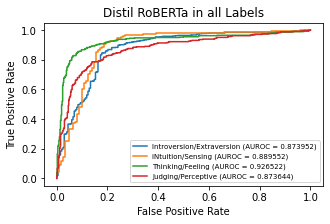

Distil BERT Base


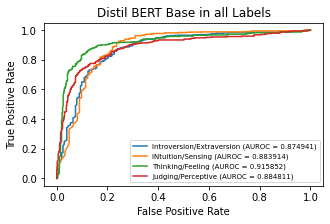

Distil BERT Multilingual


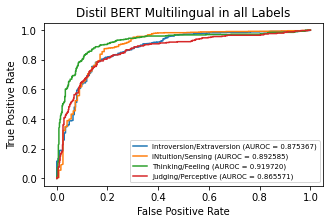

ELECTRA Base


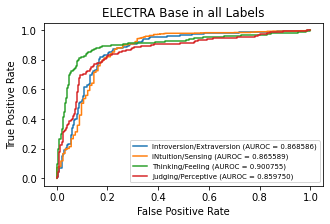

BERT Multilingual


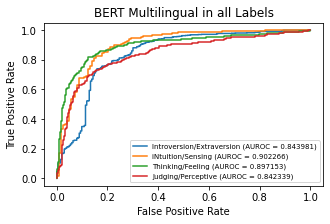

BERT Base


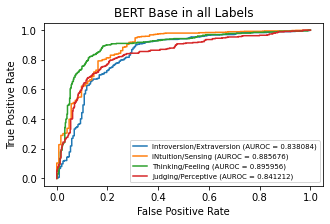

ELECTRA Small


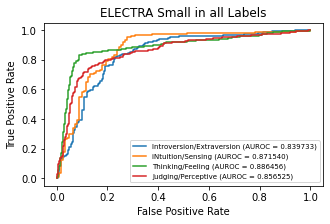

XLM RoBERTa


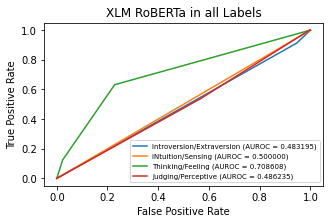

XLNet Base


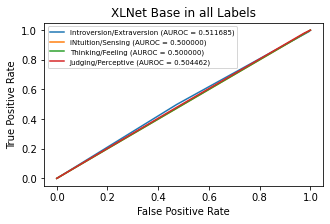

RoBERTa Base


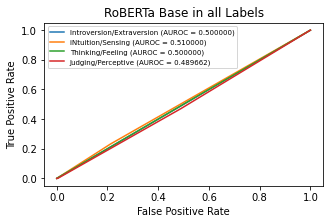

In [48]:
lead_count = 1
for i in tr_order:
    # Size
    plt.figure(figsize=(5, 3))

    tr = i
    plt.plot(fpr_tpr_IE[tr][0], fpr_tpr_IE[tr][1], label=f"{labels[0]} (AUROC = %0.6f)" % transformers_auc[tr][0])
    plt.plot(fpr_tpr_NS[tr][0], fpr_tpr_NS[tr][1], label=f"{labels[1]} (AUROC = %0.6f)" % transformers_auc[tr][1])
    plt.plot(fpr_tpr_TF[tr][0], fpr_tpr_TF[tr][1], label=f"{labels[2]} (AUROC = %0.6f)" % transformers_auc[tr][2])
    plt.plot(fpr_tpr_JP[tr][0], fpr_tpr_JP[tr][1], label=f"{labels[3]} (AUROC = %0.6f)" % transformers_auc[tr][3])

    print(tm[tr])

    # Title
    plt.title(f'{tm[tr]} in all Labels')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend(fontsize="x-small") # 
    # var save
    fig1 = plt.gcf()
    # Save Fig
    fig1.savefig(f"../figures/ROC Curves/{lead_count}-{tm[tr]}_all.png", dpi=300)
    plt.show()
    
    lead_count+=1


## **Reference**
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
2. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


---